# 動的シナプス

シナプス前活動に応じて**シナプス伝達効率** (synaptic efficacy)が動的に変化する性質を**短期的シナプス可塑性** (Short-term synaptic plasticity)といい，このような性質を持つシナプスを**動的シナプス** (dynamical synapses)と呼ぶ．シナプス伝達効率が減衰する現象を短期抑圧 (short-term depression; STD)，増強する現象を短期促通(short-term facilitation; STF)という．さらにそれぞれに対応するシナプスを減衰シナプス，増強シナプスという．

ここでは{cite:p}`Mongillo2008-kk`および{cite:p}`Orhan2019-rq`で用いられている定式化を使用する．

$$
\begin{gathered}
\frac{\mathrm{d} x(t)}{\mathrm{d} t}=\frac{1-x(t)}{\tau_{x}}-u(t) x(t) r(t) \Delta t \\
\frac{\mathrm{d} u(t)}{\mathrm{d} t}=\frac{U-u(t)}{\tau_{u}}+U(1-u(t)) r(t) \Delta t
\end{gathered}
$$

ただし，定数は以下のようにする．
- STSP neurotransmitter time constant: $\tau_x$ 200 ms/1,500 ms (facilitating/depressing)
- STSP neurotransmitter utilization: $\tau_u$ 1,500 ms/200 ms (facilitating/depressing)
- STSP neurotransmitter increment: $U$ 0.15/0.45 (facilitating/depressing)
- Time step (training and testing): $\Delta t$ 10ms

- $x$: the fraction of available neurotransmitter
- $u$: the neurotransmitter utilization

In [1]:
using PyPlot
rc("axes.spines", top=false, right=false)

In [2]:
# ms
Uf, τfₓ, τfᵤ = 0.15, 200, 1500
Ud, τdₓ, τdᵤ = 0.45, 1500, 200
dt = 1
T = 4000
tarray = 1:dt:T;
nt = Int(T/dt);
s = zeros(nt) # stimuli
s[500:150:2000] .= 1;
s[2500:200:3000] .= 1;

In [3]:
# short-term synaptic plasticity
function stsp(dt, T, s, U, τₓ, τᵤ, τₛ=30)
    nt = Int(T/dt);
    αₓ, αᵤ, αₛ = dt/τₓ, dt/τᵤ, dt/τₛ # 時定数を減衰率に変換

    u, x, r = zeros(nt), zeros(nt), zeros(nt)
    u[1], x[1] = U, 1
    
    for t in 1:nt-1
        x[t+1] = x[t] + αₓ*(1-x[t]) - u[t]*x[t]*s[t]
        u[t+1] = u[t] + αᵤ*(U-u[t]) + U*(1-u[t])*s[t]
        x[t+1], u[t+1] = clamp.([x[t+1], u[t+1]], 0, 1) # for numerical stability
        r[t+1] = (1-αₛ)*r[t] + u[t]*x[t]*s[t]/U
    end
    return u, x, r
end;

In [4]:
# simulation
uf, xf, rf = stsp(dt, T, s, Uf, τfₓ, τfᵤ)
ud, xd, rd = stsp(dt, T, s, Ud, τdₓ, τdᵤ);

# compute synaptic efficacy
xuf = uf .* xf / Uf 
xud = ud .* xd / Ud; 

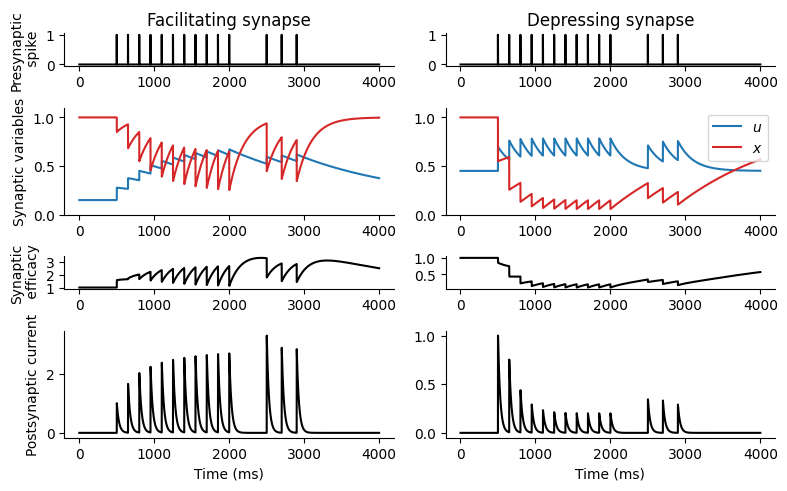

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\yamtak\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


In [5]:
figure(figsize=(8, 5))
subplot2grid((6, 2), (0, 0)); title("Facilitating synapse"); plot(tarray, s, "k"); ylabel("Presynaptic\n spike");
subplot2grid((6, 2), (0, 1)); title("Depressing synapse"); plot(tarray, s, "k");
subplot2grid((6, 2), (1, 0), rowspan=2); plot(tarray, uf); plot(tarray, xf, "tab:red"); ylabel("Synaptic variables"); ylim(0, 1.1); 
subplot2grid((6, 2), (1, 1), rowspan=2); plot(tarray, ud, label=L"$u$"); plot(tarray, xd, "tab:red", label=L"$x$"); ylim(0, 1.1); legend()
subplot2grid((6, 2), (3, 0)); plot(tarray, xuf, "k"); ylabel("Synaptic\n efficacy")
subplot2grid((6, 2), (3, 1)); plot(tarray, xud, "k"); 
subplot2grid((6, 2), (4, 0), rowspan=2); plot(tarray, rf, "k"); xlabel("Time (ms)"); ylabel("Postsynaptic current")
subplot2grid((6, 2), (4, 1), rowspan=2); plot(tarray, rd, "k"); xlabel("Time (ms)")
tight_layout()

## 参考文献
```{bibliography}
:filter: docname in docnames
```